In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from scipy.spatial import distance
# from scipy.sparse.csgraph import minimum_spanning_tree
import math
import pickle
import time



## USING PREVIOUS DATA

We want to be able to save thing 

IF Pickled = True then we will previously simulated data using the pickle packge

In [2]:
PICKLED = True

##### set parent directory

In [3]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Move to the parent directory
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

# Print the updated working directory
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)

Current Directory: /mnt/c/users/rjmay/code/research_ms/alt_distr
Updated Directory: /mnt/c/users/rjmay/code/research_ms


### Simulation stage

In [4]:
from modules.multi_bounds_v3 import bounds_class
from modules.Bhatt_knn_func import knn_num_calc
from modules.data_gen import data_gen

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
dimensions = [2, 3, 4, 6, 8]

In [6]:
bound_obj_lst = []



if PICKLED: ## We just skip all the data creation if we are using save data. 
    print("USING PREVIOUS DATA NOT SIMULATING DATA ")
else:
    for i in dimensions:
        MC_num = 400
        sample_size= 500

        start = time.time()

    
    
        func0 = np.random.uniform

        func1 = np.random.normal

        params0 = {'low': .5, 'high':3}

        params1= {"loc":0, "scale" : 1}



        dim =i

        k = knn_num_calc(sample_size, dim)
        if k== 0:
            k = 10
        
        generator = data_gen(func0, func1,  params0, params1, dim)



        bounds = bounds_class(generator, sample_size =sample_size, threads =2,  MC_num = MC_num, k_nn=k)

        bound_obj_lst.append(bounds)  
        
        end = time.time()
        
        print("done with ", i, " in ",  end -start )


This function doesn't work for dimension <3
done with  2  in  333.5488407611847
done with  3  in  339.08497619628906
done with  4  in  439.79500913619995
done with  6  in  249.00625157356262
done with  8  in  347.59771490097046


### Using the data

may or not be pickled. 

In [7]:
file_path = 'sim_data/uniform_normal.pkl' # DONT FORGET TO CHANGE ME IF YOU COPY AND PASTE


if PICKLED  == False:
    
    objects_to_save = bound_obj_lst


    with open(file_path, 'wb') as file:
        # Use pickle.dump to serialize and write the list of objects to the file
        pickle.dump(objects_to_save, file)
    print(f'Objects saved to {file_path}')
    

elif PICKLED == True:
    

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load to deserialize and load the list of objects from the file
        loaded_objects = pickle.load(file)

    print('Loaded object successfully')
    
    bound_obj_lst = loaded_objects

Objects saved to sim_data/uniform_normal.pkl


True value is     0.1536


In [8]:
BER = .1536

In [9]:
ber = np.ones(len(dimensions))* BER

In [10]:
import pandas as pd

df = pd.DataFrame([obj() for obj in bound_obj_lst], index = dimensions)

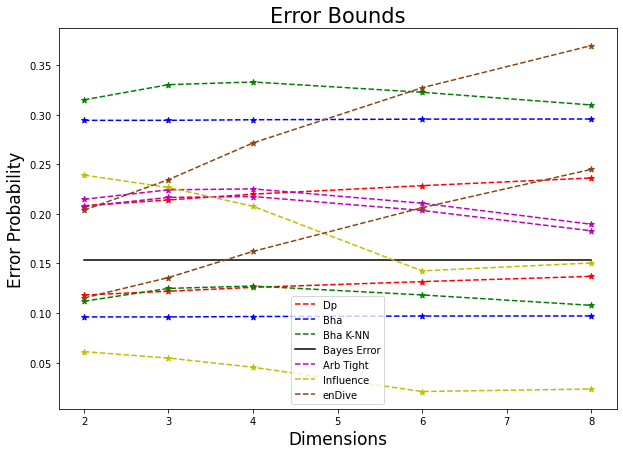

In [11]:
fs = 17

fig, ax = plt.subplots(figsize=(10, 7))

# Plot Dp
ax.plot(df["Dp_lower"], 'r--', label='Dp')
ax.plot(df["Dp_upper"], 'r--')
ax.scatter(df.index, df["Dp_lower"], color='r', marker='*')
ax.scatter(df.index, df["Dp_upper"], color='r', marker='*')

# Plot Bha
ax.plot(df["Bha_lower"], 'b--', label='Bha')
ax.plot(df["Bha_upper"], 'b--')
ax.scatter(df.index, df["Bha_upper"], color='b', marker='*')
ax.scatter(df.index, df["Bha_lower"], color='b', marker='*')

# Plot Bha K-NN
ax.plot(df["Bha_knn_lower"], 'g--')
ax.plot(df["Bha_knn_upper"], 'g--', label='Bha K-NN')
ax.scatter(df.index, df["Bha_knn_upper"], color='g', marker='*')
ax.scatter(df.index, df["Bha_knn_lower"], color='g', marker='*')

# Plot Bayes Error
ax.plot(dimensions, ber, 'k', label='Bayes Error')

# Plot Lower and Upper G_a
ax.plot(df["tight_lower"], 'm--', label="Arb Tight")
ax.plot(df["tight_upper"], 'm--')
ax.scatter(df.index, df["tight_lower"], color='m', marker='*')
ax.scatter(df.index, df["tight_upper"], color='m', marker='*')

# Plot Maha
# ax.plot( df["Maha_upper"], 'y--', label='Maha')
# ax.scatter(df.index, df["Maha_upper"], color='y', marker='*')

ax.plot(df["inf_lower"], 'y--', label="Influence")
ax.plot(df["inf_upper"], 'y--')
ax.scatter(df.index, df["inf_lower"], color='y', marker='*')
ax.scatter(df.index, df["inf_upper"], color='y', marker='*')



# Plot Lower and Upper enDive
ax.plot(df["enDive_lower"], 'saddlebrown', ls = '--', label="enDive")
ax.plot(df["enDive_upper"], 'saddlebrown', ls = '--',)
ax.scatter(df.index, df["enDive_lower"], color='saddlebrown', marker='*')
ax.scatter(df.index, df["enDive_upper"], color='saddlebrown', marker='*')


ax.set_xlabel("Dimensions", fontsize=fs)
ax.set_ylabel("Error Probability", fontsize=fs)
ax.set_title("Error Bounds", fontsize=fs + 4)
ax.legend()

plt.show()


In [14]:

lst = [obj.validity(BER) for obj in bound_obj_lst ]

df2 = pd.DataFrame(lst , index = dimensions)

df_valid = df2

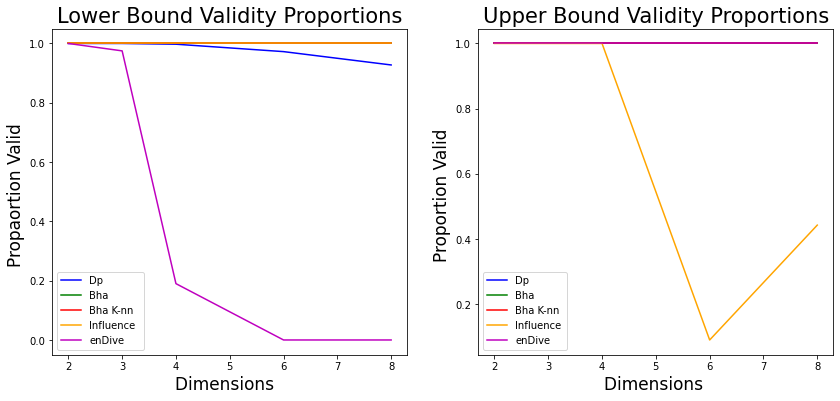

In [15]:
fs =17

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax = axes[0]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(df_valid["Dp_lower"], 'b',  label='Dp  ')
# ax.plot(sample_sizes, validity_dp_u/ MC_num, 'r', label='Upper Dp Validity ')

ax.plot(df_valid["Bha_lower"],'g', label='Bha  ')
# ax.plot(sample_sizes, validity_Bha_u/ MC_num, 'orange', label='Upper Bha Validity ')

ax.plot(df_valid["Bha_knn_lower"],'r', label='Bha K-nn  ')
# ax.plot(sample_sizes, validity_Bha_u/ MC_num, 'orange', label='Upper Bha Validity ')

ax.plot(df_valid["inf_lower"],'orange', label='Influence')

ax.plot(df_valid["enDive_lower"],'m', label='enDive')


# ax.plot(df_valid["tight_lower"],'orange', label='Tight  ')


# ax.plot(sample_sizes, validity_tight_u/ MC_num,  label='Upper Tight Validity ')
# ax.set_xticks(sample_sizes)

ax.set_xlabel("Dimensions  ", fontsize = fs)
ax.set_ylabel("Propaortion Valid ", fontsize=fs)
ax.set_title("Lower Bound Validity Proportions" , fontsize = fs +4)
ax.legend()


ax = axes[1]


# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(df_valid["Dp_upper"], 'b',  label='Dp  ')

ax.plot(df_valid["Bha_upper"],'g', label='Bha  ')

ax.plot(df_valid["Bha_knn_upper"],'r', label='Bha K-nn ')

# ax.plot(df_valid["Maha_upper"],'black', label='Maha ')
ax.plot(df_valid["inf_upper"],'orange', label='Influence')

ax.plot(df_valid["enDive_upper"],'m', label='enDive')


# ax.plot(df_valid["tight_upper"],'orange', label='Tight  ')
# ax.set_xticks(sample_sizes)
ax.set_xlabel("Dimensions ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_title("Upper Bound Validity Proportions" , fontsize = fs +4)
ax.legend()

# plt.savefig("proportions_n.png",facecolor=(1,1,1,1))
plt.show()